붓꽃 분류문제에서 클래스가 세토사와 베르시칼라 데이터만 사용하고 (setosa=0, versicolor=1) 독립변수로는 꽃받침 길이(Sepal Length)와 상수항만 사용하여 StatsModels 패키지의 로지스틱 회귀모형으로 결과를 예측하고 보고서를 출력한다. 이 보고서에서 어떤 값이 세토사와 베르시칼라를 구분하는 기준값(threshold)으로 사용되고 있는가?

위 결과를 분류결과표(confusion matrix)와 분류결과보고서(classification report)로 나타내라.

이 모형에 대해 ROC커브를 그리고 AUC를 구한다. 이 때 Scikit-Learn의 LogisticRegression을 사용하지 않고 위에서 StatsModels로 구한 모형을 사용한다.

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
dfX = pd.DataFrame(X, columns=iris.feature_names)
dfy = pd.DataFrame(y, columns=["species"])
df = pd.concat([dfX, dfy], axis=1)
df = df[["sepal length (cm)", "species"]]
df = df[df.species.isin([0, 1])]
df = df.rename(columns={"sepal length (cm)": "sepal_length" })

df.head()

,sepal_length,species
0,5.1,0
1,4.9,0
2,4.7,0
3,4.6,0
4,5.0,0


In [2]:
import statsmodels.api as sm

In [3]:
clf = sm.Logit.from_formula('species ~ sepal_length', data=df)
result = clf.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.321056
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Fri, 03 Sep 2021   Pseudo R-squ.:                  0.5368
Time:                        13:34:29   Log-Likelihood:                -32.106
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 6.320e-18
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -27.8315      5.434     -5.122      0.000     -38.481     -17.182
sepal_length     5.1403

In [11]:
# 기준값

print(result.params, '\n')

print('threshold : ', (0.5 + 27.8315) / 5.1403)

Intercept      -27.831451
sepal_length     5.140336
dtype: float64 

threshold :  5.511643289302181


In [15]:
pred = result.predict(df.sepal_length) >= 0.5

from sklearn.metrics import confusion_matrix

confusion_matrix(df.species, pred)

array([[45,  5],
       [ 6, 44]], dtype=int64)

In [16]:
# 분석 결과표

from sklearn.metrics import classification_report

print(classification_report(df.species, pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        50
           1       0.90      0.88      0.89        50

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



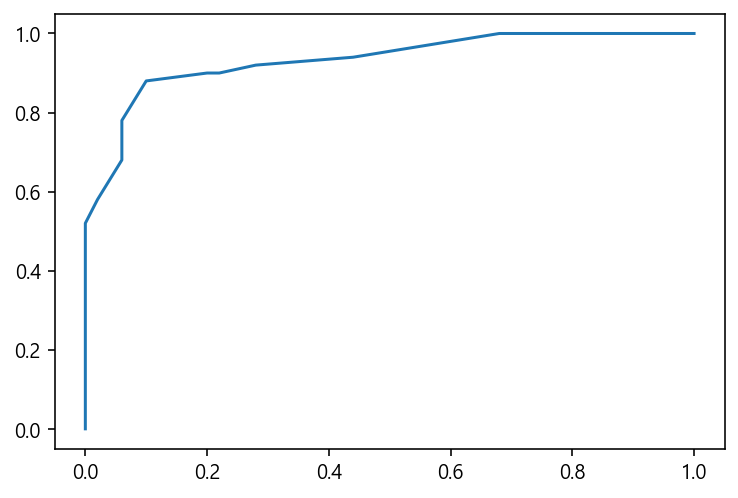

In [18]:
# ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(df.species, result.predict(df.sepal_length))
plt.plot(fpr, tpr)
plt.show()

auc가 높다는 것은 클래스를 구별하는 모델의 성능이 좋다는 의미이다.

In [19]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.9326